<a href="https://colab.research.google.com/github/benvictoria21/pandas/blob/master/regressao_linear_consumo_cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns 
from sklearn.linear_model import LinearRegression , Ridge,Lasso,LassoCV
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict,TimeSeriesSplit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

In [37]:
nomeArquivo = 'https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/Consumo_cerveja.csv'
dataset = pd.read_csv(nomeArquivo,parse_dates=True)

In [38]:
pd.set_option('display.max_columns', None)
print(dataset.head())
print(dataset.columns)

         Data Temperatura Media (C) Temperatura Minima (C)  \
0  2015-01-01                  27,3                   23,9   
1  2015-01-02                 27,02                   24,5   
2  2015-01-03                 24,82                   22,4   
3  2015-01-04                 23,98                   21,5   
4  2015-01-05                 23,82                     21   

  Temperatura Maxima (C) Precipitacao (mm)  Final de Semana  \
0                   32,5                 0              0.0   
1                   33,5                 0              0.0   
2                   29,9                 0              1.0   
3                   28,6               1,2              1.0   
4                   28,3                 0              0.0   

   Consumo de cerveja (litros)  
0                       25.461  
1                       28.972  
2                       30.814  
3                       29.799  
4                       28.900  
Index(['Data', 'Temperatura Media (C)', 'Temperatu

In [39]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB
None


In [40]:
print(dataset.tail())

    Data Temperatura Media (C) Temperatura Minima (C) Temperatura Maxima (C)  \
936  NaN                   NaN                    NaN                    NaN   
937  NaN                   NaN                    NaN                    NaN   
938  NaN                   NaN                    NaN                    NaN   
939  NaN                   NaN                    NaN                    NaN   
940  NaN                   NaN                    NaN                    NaN   

    Precipitacao (mm)  Final de Semana  Consumo de cerveja (litros)  
936               NaN              NaN                          NaN  
937               NaN              NaN                          NaN  
938               NaN              NaN                          NaN  
939               NaN              NaN                          NaN  
940               NaN              NaN                          NaN  


Text(0.5, 0.1, 'último: 2015-12-31')

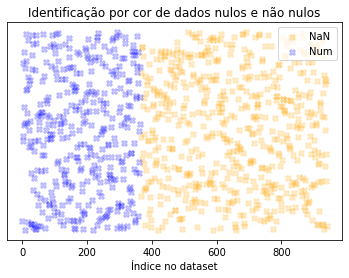

<Figure size 432x288 with 0 Axes>

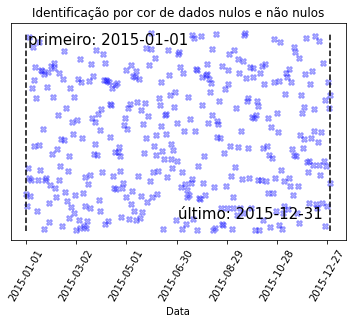

In [41]:
indicesNulos = dataset['Consumo de cerveja (litros)'].isna()
listaNaN = dataset[indicesNulos].index.tolist()
listaNum = dataset[~indicesNulos].index.tolist()

plt.figure(1)
plt.scatter(listaNaN,np.random.random(len(listaNaN))*2,marker='X',c='orange',alpha=0.2)
plt.scatter(listaNum,np.random.random(len(listaNum))*2,marker='X',c='b',alpha=0.2)
plt.xlabel('Índice no dataset')
plt.legend(['NaN','Num'],loc='upper right')
plt.tick_params(axis='y',which='both',left=False,bottom=False,labelleft=False)
plt.title('Identificação por cor de dados nulos e não nulos')

plt.figure(2)
fig,ax = plt.subplots(1,1)
plt.scatter(dataset.iloc[listaNum,0],np.random.random(len(listaNum))*2,marker='X',c='b',alpha=0.3)
primeiroRegistroNum = dataset.iloc[listaNum[0],0]
ultimoRegistroNum = dataset.iloc[listaNum[-1],0]
plt.plot([primeiroRegistroNum,primeiroRegistroNum],[0,2],c='black',linestyle='--')
plt.plot([ultimoRegistroNum,ultimoRegistroNum],[0,2],c='black',linestyle='--')
plt.xlabel('Data')
plt.title('Identificação por cor de dados nulos e não nulos')
plt.tick_params(axis='y',which='both',left=False,bottom=False,labelleft=False)
ax.xaxis.set_major_locator(MaxNLocator(8)) 
plt.tick_params(labelrotation=60)
ax.annotate('primeiro: {}'.format(dataset.iloc[listaNum[0],0]),xy=(0.05, 0.9), xycoords='axes fraction',fontsize=15)
ax.annotate('último: {}'.format(dataset.iloc[listaNum[-1],0]),xy=(0.50, 0.1), xycoords='axes fraction',fontsize=15)

In [42]:
dsPreprocessado = dataset
dsPreprocessado = dataset.dropna()

In [43]:
dsPreprocessador = dsPreprocessado.replace(',','.',inplace=True,regex=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [44]:
dsPreprocessado = dsPreprocessado.drop(columns='Data')

In [45]:
dsPreprocessado.iloc[:,0:4] = dsPreprocessado.iloc[:,0:4].apply(pd.to_numeric)
dsPreprocessado.iloc[:,4] = dsPreprocessado.iloc[:,4].astype(int)# apply(pd.to_numeric(downcast='int'))
print(dsPreprocessado.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    float64
 1   Temperatura Minima (C)       365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    int64  
 5   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 20.0 KB
None


In [46]:
print(dsPreprocessado.describe())

       Temperatura Media (C)  Temperatura Minima (C)  Temperatura Maxima (C)  \
count             365.000000              365.000000              365.000000   
mean               21.226356               17.461370               26.611507   
std                 3.180108                2.826185                4.317366   
min                12.900000               10.600000               14.500000   
25%                19.020000               15.300000               23.800000   
50%                21.380000               17.900000               26.900000   
75%                23.280000               19.600000               29.400000   
max                28.860000               24.500000               36.500000   

       Precipitacao (mm)  Final de Semana  Consumo de cerveja (litros)  
count         365.000000       365.000000                   365.000000  
mean            5.196712         0.284932                    25.401367  
std            12.417844         0.452001                   

<Figure size 432x288 with 0 Axes>

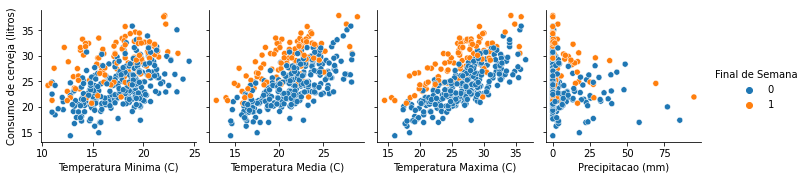

In [47]:
plt.figure(1)
sns.pairplot(dsPreprocessado,x_vars=['Temperatura Minima (C)','Temperatura Media (C)','Temperatura Maxima (C)','Precipitacao (mm)'],y_vars=['Consumo de cerveja (litros)'],hue='Final de Semana',diag_kind=None)

Text(0, 0.5, 'Consumo de cerveja [L]')

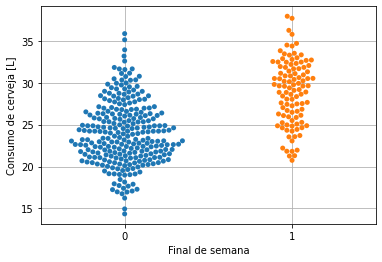

In [48]:
plt.figure(2)
sns.swarmplot(x='Final de Semana',y='Consumo de cerveja (litros)',data=dsPreprocessado)
plt.grid()
plt.xlabel('Final de semana')
plt.ylabel('Consumo de cerveja [L]')

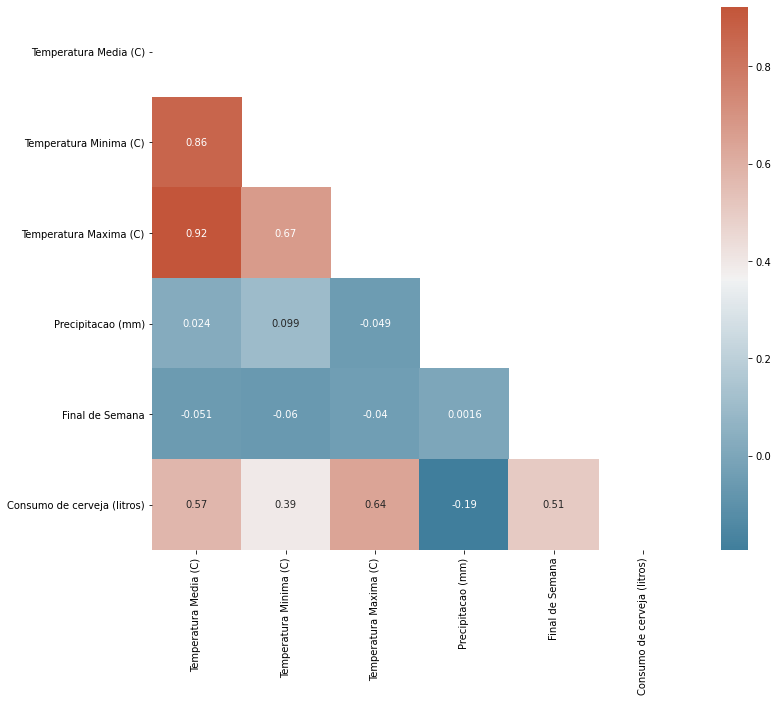

In [49]:
correlation = dsPreprocessado.corr()

f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle

mask = np.triu(np.ones_like(correlation,dtype=bool))

# Configure a custom diverging colormap

cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(correlation,cmap=cmap,mask=mask,annot=True)

In [50]:
reg = LinearRegression()
y = dsPreprocessado['Consumo de cerveja (litros)'].values #target
x = dsPreprocessado.drop(columns='Consumo de cerveja (litros)').values #fetures
xColunas = dsPreprocessado.drop(columns='Consumo de cerveja (litros)').columns

Text(17.5, 4, 'média = 0.012 \nstd = 2.364')

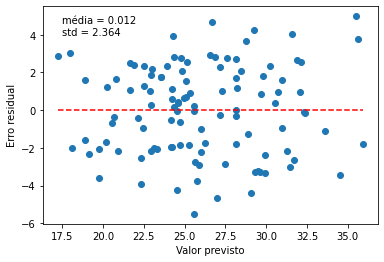

In [51]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.3,random_state=42)
reg.fit(xTrain,yTrain)
yPred = reg.predict(xTest)
res = yPred - yTest
avgRes = round(np.mean(res),3)
stdRes = round(np.std(res),3)


plt.figure(1)
plt.scatter(yPred,res)
plt.plot([min(yPred),max(yPred)],[avgRes,avgRes],linestyle='--',c='red')
plt.xlabel('Valor previsto')
plt.ylabel('Erro residual')
plt.text(17.5,4,'média = {} \nstd = {}'.format(avgRes,stdRes))

In [52]:
#função para calcular R2 ajustado
def calculaR2ajustado(r2Score,x):
  n = np.shape(x)[0]
  k = np.shape(x)[1]
  return 1 - (1-r2Score)*(n-1)/(n-k-1)

In [53]:
print('Valor de R2: {}'.format(reg.score(xTest,yTest)))
print('Valor MSE: {}' .format(mean_squared_error(yTest,yPred)))
print('Valor de R2 ajustado: {}'.format(calculaR2ajustado(reg.score(xTest,yTest),xTest)))
print('Coeficientes da regressão: {}'.format(reg.coef_))
print('Intercept da regressão: {} \n'.format(reg.intercept_))

Valor de R2: 0.7437419586478452
Valor MSE: 5.589532075363928
Valor de R2 ajustado: 0.7314218605059146
Coeficientes da regressão: [ 0.22915007 -0.10521557  0.55878262 -0.05349757  5.33691137]
Intercept da regressão: 6.265398516782881 



In [54]:
vif = [variance_inflation_factor(xTrain, i) for i in range(xTrain.shape[1])]
for v, c in zip(vif,xColunas):
  print('VIF de {} : {}'.format(c,v))

VIF de Temperatura Media (C) : 1089.0096126678473
VIF de Temperatura Minima (C) : 246.33109652824592
VIF de Temperatura Maxima (C) : 440.5687362709731
VIF de Precipitacao (mm) : 1.2370892202261092
VIF de Final de Semana : 1.3069533790772296


In [55]:
dsTMaxMin  = dsPreprocessado.drop(columns='Temperatura Media (C)')
dsTMedia = dsPreprocessado.drop(columns=['Temperatura Maxima (C)','Temperatura Minima (C)'])
dsTMax = dsPreprocessado.drop(columns=['Temperatura Media (C)','Temperatura Minima (C)'])
dsTMin = dsPreprocessado.drop(columns=['Temperatura Media (C)','Temperatura Maxima (C)'])
dsTMediaMax = dsPreprocessado.drop(columns=['Temperatura Minima (C)'])
dsTMediaMin = dsPreprocessado.drop(columns=['Temperatura Maxima (C)'])

yTMaxMin = dsTMaxMin['Consumo de cerveja (litros)'].values
xTMaxMin = dsTMaxMin.drop(columns='Consumo de cerveja (litros)').values

yTMedia = dsTMedia['Consumo de cerveja (litros)'].values
xTMedia = dsTMedia.drop(columns='Consumo de cerveja (litros)').values

yTMediaMax = dsTMediaMax['Consumo de cerveja (litros)'].values
xTMediaMax = dsTMediaMax.drop(columns='Consumo de cerveja (litros)').values

yTMediaMin = dsTMediaMin['Consumo de cerveja (litros)'].values
xTMediaMin = dsTMediaMin.drop(columns='Consumo de cerveja (litros)').values

yTMedia = dsTMedia['Consumo de cerveja (litros)'].values
xTMedia = dsTMedia.drop(columns='Consumo de cerveja (litros)').values

yTMax = dsTMax['Consumo de cerveja (litros)'].values
xTMax = dsTMax.drop(columns='Consumo de cerveja (litros)').values

yTMin = dsTMin['Consumo de cerveja (litros)'].values
xTMin = dsTMin.drop(columns='Consumo de cerveja (litros)').values
xTMaxMinTrain,xTMaxMinTest,yTMaxMinTrain,yTMaxMinTest = train_test_split(xTMaxMin,yTMaxMin,test_size=0.4,random_state=42)
regTMaxMin = LinearRegression()
regTMaxMin.fit(xTMaxMinTrain,yTMaxMinTrain)
yTMaxMinPred = regTMaxMin.predict(xTMaxMinTest)
resTMaxMin = yTMaxMinPred - yTMaxMinTest
avgResTMaxMin = round(np.mean(resTMaxMin),3)
stdResTMaxMin = round(np.std(resTMaxMin),3)
vifTMaxMin = [variance_inflation_factor(xTMaxMinTrain, i) for i in range(xTMaxMinTrain.shape[1])]

print('--- TMaxMin ---')
print('Valor de R2: {}'.format(regTMaxMin.score(xTMaxMinTest,yTMaxMinTest)))
print('Valor de R2 ajustado: {}'.format(calculaR2ajustado(regTMaxMin.score(xTMaxMinTest,yTMaxMinTest),xTMaxMinTest)))
print('Valor MSE: {}' .format(mean_squared_error(yTMaxMinTest,yTMaxMinPred)))
print('Coeficientes da regressão: {}'.format(regTMaxMin.coef_))
print('Intercept da regressão: {}'.format(regTMaxMin.intercept_))
print('VIF : {}\n'.format(vifTMaxMin))
print('* * * * * *\n')


xTMediaTrain,xTMediaTest,yTMediaTrain,yTMediaTest = train_test_split(xTMedia,yTMedia,test_size=0.4,random_state=42)
regTMedia = LinearRegression()
regTMedia.fit(xTMediaTrain,yTMediaTrain)
yTMediaPred = regTMedia.predict(xTMediaTest)
resTMedia = yTMediaPred - yTMediaTest
avgResTMedia = round(np.mean(resTMedia),3)
stdResTMedia = round(np.std(resTMedia),3)
vifTMedia = [variance_inflation_factor(xTMediaTrain, i) for i in range(xTMediaTrain.shape[1])]



print('--- TMedia ---')
print('Valor de R2: {}'.format(regTMedia.score(xTMediaTest,yTMediaTest)))
print('Valor de R2 ajustado: {}'.format(calculaR2ajustado(regTMedia.score(xTMediaTest,yTMediaTest),xTMediaTest)))
print('Valor MSE: {}' .format(mean_squared_error(yTMediaTest,yTMediaPred)))
print('Coeficientes da regressão: {}'.format(regTMedia.coef_))
print('Intercept da regressão: {}'.format(regTMedia.intercept_))
print('VIF : {}\n'.format(vifTMedia))
print('* * * * * *\n')

xTMediaMaxTrain,xTMediaMaxTest,yTMediaMaxTrain,yTMediaMaxTest = train_test_split(xTMediaMax,yTMediaMax,test_size=0.4,random_state=42)
regTMediaMax = LinearRegression()
regTMediaMax.fit(xTMediaMaxTrain,yTMediaMaxTrain)
yTMediaMaxPred = regTMediaMax.predict(xTMediaMaxTest)
resTMediaMax = yTMediaMaxPred - yTMediaMaxTest
avgResTMediaMax = round(np.mean(resTMediaMax),3)
stdResTMediaMax = round(np.std(resTMediaMax),3)
vifTMediaMax = [variance_inflation_factor(xTMediaMaxTrain, i) for i in range(xTMediaMaxTrain.shape[1])]



print('--- TMediaMax ---')
print('Valor de R2: {}'.format(regTMediaMax.score(xTMediaMaxTest,yTMediaMaxTest)))
print('Valor de R2 ajustado: {}'.format(calculaR2ajustado(regTMediaMax.score(xTMediaMaxTest,yTMediaMaxTest),xTMediaMaxTest)))
print('Valor MSE: {}' .format(mean_squared_error(yTMediaMaxTest,yTMediaMaxPred)))
print('Coeficientes da regressão: {}'.format(regTMediaMax.coef_))
print('Intercept da regressão: {}'.format(regTMediaMax.intercept_))
print('VIF : {}\n'.format(vifTMediaMax))
print('* * * * * *\n')

xTMediaMinTrain,xTMediaMinTest,yTMediaMinTrain,yTMediaMinTest = train_test_split(xTMediaMin,yTMediaMin,test_size=0.4,random_state=42)
regTMediaMin = LinearRegression()
regTMediaMin.fit(xTMediaMinTrain,yTMediaMinTrain)
yTMediaMinPred = regTMediaMin.predict(xTMediaMinTest)
resTMediaMin = yTMediaMinPred - yTMediaMinTest
avgResTMediaMin = round(np.mean(resTMediaMin),3)
stdResTMediaMin = round(np.std(resTMediaMin),3)
vifTMediaMin = [variance_inflation_factor(xTMediaMinTrain, i) for i in range(xTMediaMinTrain.shape[1])]



print('--- TMediaMin ---')
print('Valor de R2: {}'.format(regTMediaMin.score(xTMediaMinTest,yTMediaMinTest)))
print('Valor de R2 ajustado: {}'.format(calculaR2ajustado(regTMediaMin.score(xTMediaMinTest,yTMediaMinTest),xTMediaMinTest)))
print('Valor MSE: {}' .format(mean_squared_error(yTMediaMinTest,yTMediaMinPred)))
print('Coeficientes da regressão: {}'.format(regTMediaMin.coef_))
print('Intercept da regressão: {}'.format(regTMediaMin.intercept_))
print('VIF : {}\n'.format(vifTMediaMin))
print('* * * * * *\n')


xTMaxTrain,xTMaxTest,yTMaxTrain,yTMaxTest = train_test_split(xTMax,yTMax,test_size=0.4,random_state=42)
regTMax = LinearRegression()
regTMax.fit(xTMaxTrain,yTMaxTrain)
yTMaxPred = regTMax.predict(xTMaxTest)
resTMax = yTMaxPred - yTMaxTest
avgResTMax = round(np.mean(resTMax),3)
stdResTMax = round(np.std(resTMax),3)
vifTMax = [variance_inflation_factor(xTMaxTrain, i) for i in range(xTMaxTrain.shape[1])]

print('--- TMax ---')
print('Valor de R2: {}'.format(regTMax.score(xTMaxTest,yTMaxTest)))
print('Valor de R2 ajustado: {}'.format(calculaR2ajustado(regTMax.score(xTMaxTest,yTMaxTest),xTMaxTest)))
print('Valor MSE: {}' .format(mean_squared_error(yTMaxTest,yTMaxPred)))
print('Coeficientes da regressão: {}'.format(regTMax.coef_))
print('Intercept da regressão: {}'.format(regTMax.intercept_))
print('VIF : {}\n'.format(vifTMax))
print('* * * * * *\n')


xTMinTrain,xTMinTest,yTMinTrain,yTMinTest = train_test_split(xTMin,yTMin,test_size=0.4,random_state=42)
regTMin = LinearRegression()
regTMin.fit(xTMinTrain,yTMinTrain)
yTMinPred = regTMin.predict(xTMinTest)
resTMin = yTMinPred - yTMinTest
avgResTMin = round(np.mean(resTMin),3)
stdResTMin = round(np.std(resTMin),3)
vifTMin = [variance_inflation_factor(xTMinTrain, i) for i in range(xTMinTrain.shape[1])]

print('--- TMin ---')
print('Valor de R2: {}'.format(regTMin.score(xTMinTest,yTMinTest)))
print('Valor de R2 ajustado: {}'.format(calculaR2ajustado(regTMin.score(xTMinTest,yTMinTest),xTMinTest)))
print('Valor MSE: {}' .format(mean_squared_error(yTMinTest,yTMinPred)))
print('Coeficientes da regressão: {}'.format(regTMin.coef_))
print('Intercept da regressão: {}'.format(regTMin.intercept_))
print('VIF : {}\n'.format(vifTMin))
print('* * * * * *\n')

--- TMaxMin ---
Valor de R2: 0.7584374038922248
Valor de R2 ajustado: 0.7515845642863305
Valor MSE: 5.390256145980495
Coeficientes da regressão: [ 3.13732849e-03  6.41402340e-01 -5.62856508e-02  5.19080266e+00]
Intercept da regressão: 7.0186987152597915
VIF : [61.87832909268952, 61.05153657609053, 1.2418137520003742, 1.3160756032397594]

* * * * * *

--- TMedia ---
Valor de R2: 0.6858081318334626
Valor de R2 ajustado: 0.679170275463747
Valor MSE: 7.010914254482382
Coeficientes da regressão: [ 0.81217542 -0.07264211  5.34207845]
Intercept da regressão: 6.97949264654158
VIF : [1.518324321661072, 1.1834424965693044, 1.310122116839536]

* * * * * *

--- TMediaMax ---
Valor de R2: 0.7566311909950149
Valor de R2 ajustado: 0.7497271113069301
Valor MSE: 5.430560192745214
Coeficientes da regressão: [ 0.08705344  0.58341113 -0.05770498  5.21916696]
Intercept da regressão: 6.773166142198658
VIF : [274.1552790692095, 272.295311101468, 1.2249418667599412, 1.3159268899196022]

* * * * * *

--- TMedi

Valores de R2 para validação cruzada: [0.77945658 0.66222214 0.70286297 0.60604237 0.692136   0.6034347 ]
Média de R2 para validação cruzada: 0.6743591263951342
Std todos: 0.06057876421261618


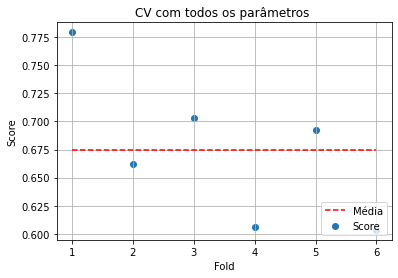

In [56]:
folds = 6
scores = cross_val_score(reg,xTrain,yTrain,cv=folds)
avgScores = np.mean(scores)

plt.scatter(list(range(1,folds+1)),scores)
plt.plot([1,folds],[avgScores,avgScores],linestyle='--',c='red')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.xticks(ticks=list(range(1,folds+1)))
plt.legend(['Média','Score'],loc='lower right')
plt.title('CV com todos os parâmetros ')
plt.grid()
print('Valores de R2 para validação cruzada: {}'.format(scores))
print('Média de R2 para validação cruzada: {}'.format(avgScores))
print('Std todos: {}'.format(np.std(scores)))

Valores de R2 para validação cruzada: [0.67624096 0.75498835 0.59380505 0.56126019 0.71588952 0.64054785]
Média de R2 para validação cruzada: 0.6571219886451956
Std TMax: 0.06692060346111119


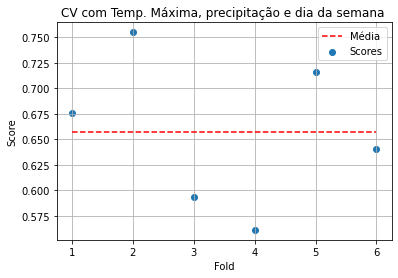

In [57]:
scoresTMax = cross_val_score(regTMax,xTMaxTrain,yTMaxTrain,cv=folds)
avgScoresTMax = np.mean(scoresTMax)
plt.scatter(list(range(1,folds+1)),scoresTMax)
plt.plot([1,folds],[avgScoresTMax,avgScoresTMax],linestyle='--',c='red')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.xticks(ticks=list(range(1,folds+1)))
plt.legend(['Média','Scores'],loc='upper right')
plt.title('CV com Temp. Máxima, precipitação e dia da semana ')
plt.grid()
print('Valores de R2 para validação cruzada: {}'.format(scoresTMax))
print('Média de R2 para validação cruzada: {}'.format(avgScoresTMax))
print('Std TMax: {}'.format(np.std(scoresTMax)))

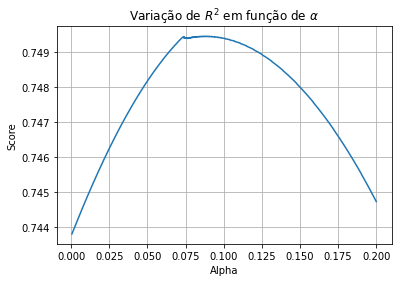

In [58]:
scoresLasso = []
alphas = np.linspace(5e-4,2e-1,num=10000)

for a in alphas:
  regLasso = Lasso(alpha=a)
  regLasso.fit(xTrain,yTrain)
  yPredLasso = regLasso.predict(xTest)
  scoresLasso.append(regLasso.score(xTest,yTest))

plt.plot(alphas,scoresLasso)
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title(r'Variação de $R^2$ em função de $\alpha$')
plt.grid()

In [33]:
alphasCV = np.linspace(5e-4,2e-1,num=10000)
paramGridLasso = {'alpha' : alphasCV,
              'normalize': [True,False]}
regLassoCV= GridSearchCV(Lasso(),cv=folds,param_grid= paramGridLasso)
regLassoCV.fit(xTrain,yTrain)
yPredRegLassoCV = regLassoCV.predict(xTest)
resLassoCV = yPredRegLassoCV - yTest
print('Valor de R2 Lasso: {}'.format(regLassoCV.score(xTest,yTest)))
print('Valor de R2 ajustado Lasso: {}'.format(calculaR2ajustado(regLassoCV.score(xTest,yTest),xTest)))
print('Valor MSE Lasso: {}' .format(mean_squared_error(yTest,yPredRegLassoCV)))
print('Coeficientes : {}'.format(regLassoCV.best_estimator_.coef_))
print('Intercept : {}'.format(regLassoCV.best_estimator_.intercept_))
print('Melhores parâmetros: {}'.format(regLassoCV.best_params_))

Valor de R2 Lasso: 0.7470524287758228
Valor de R2 ajustado Lasso: 0.7348914878515835
Valor MSE Lasso: 5.5173236917080315
Coeficientes : [ 0.05454905 -0.          0.615922   -0.04989285  5.20346178]
Intercept : 6.630047959237995
Melhores parâmetros: {'alpha': 0.003552655265526553, 'normalize': True}


Text(16.8, 4, '$\\mu$ = 0.002\n$\\sigma$ = 2.349')

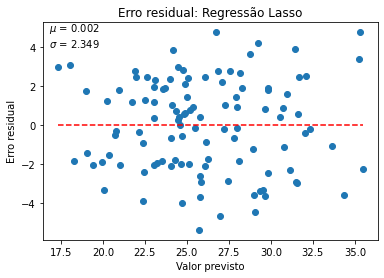

In [34]:
resLassoCV = yPredRegLassoCV - yTest
avgResLassoCV = round(np.mean(resLassoCV),3)
stdResLassoCV = round(np.std(resLassoCV),3)

plt.scatter(yPredRegLassoCV,resLassoCV)
plt.plot([min(yPredRegLassoCV),max(yPredRegLassoCV)],[avgResLassoCV,avgResLassoCV],linestyle='--',c='red')
plt.title('Erro residual: Regressão Lasso')
plt.xlabel('Valor previsto')
plt.ylabel('Erro residual')
plt.text(16.8,4,'$\mu$ = {}\n$\sigma$ = {}'.format(avgResLassoCV,stdResLassoCV))

Valor de R2 TMax: 0.7584496099737779
Valor de R2 ajustado TMax: 0.7533464327197028
Valor MSE: 5.389983778042867
Coeficientes : [ 0.6428134  -0.056173    5.18885659]
Intercept : 7.035388048622906
Melhores parâmetros: {'normalize': False}


Text(0, 0.5, 'Erro residual')

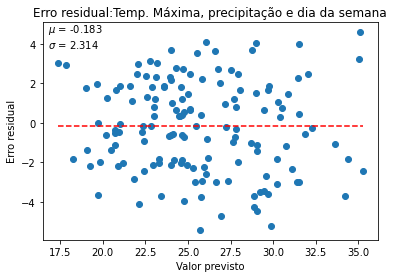

In [35]:
regTMaxCV= GridSearchCV(regTMax,cv=folds,param_grid={'normalize':[True,False]})
regTMaxCV.fit(xTMaxTrain,yTMaxTrain)
yPredTMaxCV = regTMaxCV.predict(xTMaxTest)
resTMaxCV = yPredTMaxCV - yTMaxTest
avgResTMaxCV = round(np.mean(resTMaxCV),3)
stdResTMaxCV = round(np.std(resTMaxCV),3)


print('Valor de R2 TMax: {}'.format(regTMaxCV.score(xTMaxTest,yTMaxTest)))
print('Valor de R2 ajustado TMax: {}'.format(calculaR2ajustado(regTMaxCV.score(xTMaxTest,yTMaxTest),xTMaxTest)))
print('Valor MSE: {}' .format(mean_squared_error(yTMaxTest,yPredTMaxCV)))
print('Coeficientes : {}'.format(regTMaxCV.best_estimator_.coef_))
print('Intercept : {}'.format(regTMaxCV.best_estimator_.intercept_))
print('Melhores parâmetros: {}'.format(regTMaxCV.best_params_))

plt.scatter(yPredTMaxCV,resTMaxCV)
plt.plot([min(yPredTMaxCV),max(yPredTMaxCV)],[avgResTMaxCV,avgResTMaxCV],linestyle='--',c='red')
plt.text(16.8,3.8,'$\mu$ = {}\n$\sigma$ = {}'.format(avgResTMaxCV,stdResTMaxCV))
plt.title('Erro residual:Temp. Máxima, precipitação e dia da semana')
plt.xlabel('Valor previsto')
plt.ylabel('Erro residual')